In [1]:
!pip install fredapi

In [2]:
#Head to fred api website to get an api key - https://fred.stlouisfed.org/docs/api/api_key.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fred_key = '<input your API key>'

# 1. Create The Fred Object

In [5]:
fred = Fred(api_key = fred_key)

# 2. Search Fred for economic data

In [7]:
#Fred allows us to search or pull down the data

snp_search = fred.search('S&P', order_by='popularity')
snp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-10-12   2024-10-12   
CSUSHPINSA          CSUSHPINSA     2024-10-12   2024-10-12   
SP500                    SP500     2024-10-12   2024-10-12   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-10-12   2024-10-12   
BAMLC0A0CM          BAMLC0A0CM     2024-10-12   2024-10-12   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
BAMLC0A0CM      ICE BofA US Corporate Index Option-Adjusted Sp...   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-10-10  Daily, Close   
CSUSHPINSA            1987-01-01      2024-07-01       Monthly   
SP500                 2014-10-13      2024-10-11  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2024-10-10  Daily, Close   
BAMLC0A0CM            1996-12-31      2024-10-10  Daily, Close   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
SP500                        D               Index               Index   
BAMLH0A0HYM2EY               D             Percent                   %   
BAMLC0A0CM                   D             Percent                   %   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
BAMLC0A0CM      Not Seasonally Adjusted                       NSA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2024-10-11 08:02:24-05:00         92   
CSUSHPINSA      2024-09-25 10:50:02-05:00         88   
SP500           2024-10-11 19:25:21-05:00         83   
BAMLH0A0HYM2EY  2024-10-11 08:02:24-05:00         82   
BAMLC0A0CM      2024-10-11 08:06:03-05:00         78   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
SP500           The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
BAMLC0A0CM      The ICE BofA Option-Adjusted Spreads (OASs) ar...

# 3. Pull some raw data & plot it

In [9]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

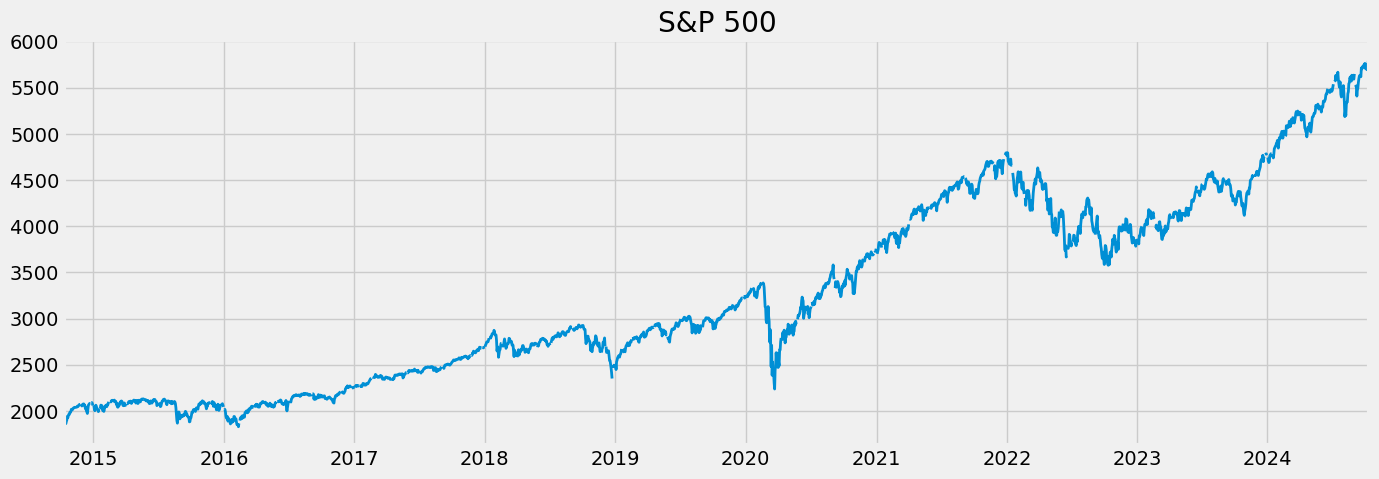

In [10]:
sp500.plot(figsize = (15,5), title = 'S&P 500', lw = 2)

# 4. Pull and Join Multiple Data Series

In [12]:
#Search for unemployment rates datasets
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))

#Queries the unemployment search result with only seasonally adjusted and percentages
umemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

#Narrows down the title of the search to only those that contains 'Unemployment Rate'
unemp_df = umemp_df.loc[umemp_df['title'].str.contains('Unemployment Rate in')]

In [13]:
unemp_df

id realtime_start realtime_end  \
series id                                                                
CAUR                                  CAUR     2024-10-12   2024-10-12   
TXUR                                  TXUR     2024-10-12   2024-10-12   
NYUR                                  NYUR     2024-10-12   2024-10-12   
FLUR                                  FLUR     2024-10-12   2024-10-12   
PAUR                                  PAUR     2024-10-12   2024-10-12   
OHUR                                  OHUR     2024-10-12   2024-10-12   
MIUR                                  MIUR     2024-10-12   2024-10-12   
ALUR                                  ALUR     2024-10-12   2024-10-12   
MAUR                                  MAUR     2024-10-12   2024-10-12   
NCUR                                  NCUR     2024-10-12   2024-10-12   
ILUR                                  ILUR     2024-10-12   2024-10-12   
NJUR                                  NJUR     2024-10-12   2024-10-12   
GAUR                                  GAUR     2024-10-12   2024-10-12   
COUR                                  COUR     2024-10-12   2024-10-12   
AZUR                                  AZUR     2024-10-12   2024-10-12   
WIUR                                  WIUR     2024-10-12   2024-10-12   
VAUR                                  VAUR     2024-10-12   2024-10-12   
KYUR                                  KYUR     2024-10-12   2024-10-12   
SCUR                                  SCUR     2024-10-12   2024-10-12   
NMUR                                  NMUR     2024-10-12   2024-10-12   
MNUR                                  MNUR     2024-10-12   2024-10-12   
TNUR                                  TNUR     2024-10-12   2024-10-12   
WAUR                                  WAUR     2024-10-12   2024-10-12   
MDUR                                  MDUR     2024-10-12   2024-10-12   
ORUR                                  ORUR     2024-10-12   2024-10-12   
WVUR                                  WVUR     2024-10-12   2024-10-12   
NVUR                                  NVUR     2024-10-12   2024-10-12   
ARUR                                  ARUR     2024-10-12   2024-10-12   
OKUR                                  OKUR     2024-10-12   2024-10-12   
MOUR                                  MOUR     2024-10-12   2024-10-12   
AKUR                                  AKUR     2024-10-12   2024-10-12   
IAUR                                  IAUR     2024-10-12   2024-10-12   
UTUR                                  UTUR     2024-10-12   2024-10-12   
PRUR                                  PRUR     2024-10-12   2024-10-12   
INUR                                  INUR     2024-10-12   2024-10-12   
LAUR                                  LAUR     2024-10-12   2024-10-12   
HIUR                                  HIUR     2024-10-12   2024-10-12   
LASMT261982000000003  LASMT261982000000003     2024-10-12   2024-10-12   
NDUR                                  NDUR     2024-10-12   2024-10-12   
MTUR                                  MTUR     2024-10-12   2024-10-12   
DCUR                                  DCUR     2024-10-12   2024-10-12   
MSUR                                  MSUR     2024-10-12   2024-10-12   
MEUR                                  MEUR     2024-10-12   2024-10-12   
NEUR                                  NEUR     2024-10-12   2024-10-12   
LASMT391746000000003  LASMT391746000000003     2024-10-12   2024-10-12   
CTUR                                  CTUR     2024-10-12   2024-10-12   
IDUR                                  IDUR     2024-10-12   2024-10-12   
NHUR                                  NHUR     2024-10-12   2024-10-12   
RIUR                                  RIUR     2024-10-12   2024-10-12   
KSUR                                  KSUR     2024-10-12   2024-10-12   
WYUR                                  WYUR     2024-10-12   2024-10-12   
DEUR                                  DEUR     2024-10-12   2024-10-12   
VTUR                                  VTUR  

In [14]:
#Get the unemp rate in USA first
#first_result = fred.get_series(series_id = 'UNRATE')
#first_result = first_result.to_frame(name = 'UNRATE')
all_results = []
#all_results.append(first_result)

for id in unemp_df.index:
    if id == 'LASMT261982000000003' or id == 'LASMT391746000000003': continue
    results = fred.get_series(id)
    results = results.to_frame(name = id)
    all_results.append(results)

In [31]:
all_results

[            LBSSA13
 1976-01-01     63.7
 1976-02-01     63.6
 1976-03-01     63.5
 1976-04-01     63.5
 1976-05-01     63.6
 ...             ...
 2024-04-01     61.5
 2024-05-01     61.6
 2024-06-01     61.7
 2024-07-01     61.8
 2024-08-01     61.8
 
 [584 rows x 1 columns],
             LBSSA06
 1976-01-01     62.6
 1976-02-01     62.4
 1976-03-01     62.2
 1976-04-01     62.2
 1976-05-01     62.3
 ...             ...
 2024-04-01     62.0
 2024-05-01     62.0
 2024-06-01     62.0
 2024-07-01     62.0
 2024-08-01     62.1
 
 [584 rows x 1 columns],
             LBSSA01
 1976-01-01     57.0
 1976-02-01     56.9
 1976-03-01     56.8
 1976-04-01     56.8
 1976-05-01     56.8
 ...             ...
 2024-04-01     57.5
 2024-05-01     57.5
 2024-06-01     57.5
 2024-07-01     57.5
 2024-08-01     57.5
 
 [584 rows x 1 columns],
             LBSSA53
 1976-01-01     60.9
 1976-02-01     60.7
 1976-03-01     60.6
 1976-04-01     60.6
 1976-05-01     60.7
 ...             ...
 2024-04-01     

In [15]:
unemp_states = pd.concat(all_results, axis = 1)

In [33]:
unemp_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-04-01         5.3    4.0       4.2      3.3           3.4   4.0   
2024-05-01         5.2    4.0       4.2      3.3           3.4   4.2   
2024-06-01         5.2    4.0       4.2      3.3           3.4   4.4   
2024-07-01         5.2    4.1       4.3      3.3           3.4   4.5   
2024-08-01         5.3    4.1       4.4      3.3           3.4   4.5   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.6           10.5             6.4       6.6   
1976-02-01       9.9      6.6           10.5             6.4       6.6   
1976-03-01       9.9      6.6           10.5             6.4       6.6   
1976-04-01       9.8      6.5           10.3             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   
...              ...      ...            ...             ...       ...   
2024-04-01       3.9      3.1            2.9             3.5       4.8   
2024-05-01       3.9      3.0            3.0             3.6       4.9   
2024-06-01       4.1      2.9            3.2             3.6       5.0   
2024-07-01       4.4      2.8            3.5             3.7       5.2   
2024-08-01       4.5      2.8            3.7             3.8       5.3   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.3      8.4       5.8     10.2        5.8       6.1   
1976-02-01        10.3      8.4       5.7     10.2        5.8       6.1   
1976-03-01        10.3      8.4       5.7     10.1        5.7       6.1   
1976-04-01        10.3      8.3       5.6     10.0        5.6       6.0   
1976-05-01        10.3      8.1       5.6      9.8        5.5       5.9   
...                ...      ...       ...      ...        ...       ...   
2024-04-01         4.7      3.1       3.7      3.6        2.9       2.8   
2024-05-01         4.6      3.2       3.8      3.4        2.9       2.7   
2024-06-01         4.6      3.3       3.8      3.3        2.9       2.7   
2024-07-01         4.7      3.4       3.9      3.4        3.0       2.7   
2024-08-01         4.8      3.6       4.0      3.4        2.9       2.8   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.4         8.6        6.0        6.0   
1976-02-01       5.6             7.4         8.7        6.0        6.0   
1976-03-01       5.6             7.3         8.7        5.9        6.0   
1976-04-01       5.6             7.2         8.6        5.8        6.0   
1976-05-01       5.5             7.0         8.6        5.7        5.9   
...              ...             ...         ...        ...        ...   
2024-04-01       4.6             3.2         3.8        2.7        3.1   
2024-05-01       4.6             3.4         3.8        2.8        3.0   
2024-06-01       4.6             3.6         3.9        2.9        3.0   
2024-07-01       4.7             3.9         4.0        3.2        3.0   
2024-08-01       4.8             4.3         4.1        3.3        3.1   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1976-01-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-02-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-03-01         8.4       6.4     9.4            7.5     9.2       7.3   
1976-04-01         8.5       6.4     9.2            7.5     9.0       7.2   
1976-05-01         8.5       6.5     9.1            7.4     8.9       7.1   
...   

In [16]:
#We wont be using the first dataset, we will focus on the states
#unemp_states = unemp_results.drop('UNRATE', axis = 1)
#drop the null values
unemp_states = unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [17]:
unemp_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-04-01         5.3    4.0       4.2      3.3           3.4   4.0   
2024-05-01         5.2    4.0       4.2      3.3           3.4   4.2   
2024-06-01         5.2    4.0       4.2      3.3           3.4   4.4   
2024-07-01         5.2    4.1       4.3      3.3           3.4   4.5   
2024-08-01         5.3    4.1       4.4      3.3           3.4   4.5   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.6           10.5             6.4       6.6   
1976-02-01       9.9      6.6           10.5             6.4       6.6   
1976-03-01       9.9      6.6           10.5             6.4       6.6   
1976-04-01       9.8      6.5           10.3             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   
...              ...      ...            ...             ...       ...   
2024-04-01       3.9      3.1            2.9             3.5       4.8   
2024-05-01       3.9      3.0            3.0             3.6       4.9   
2024-06-01       4.1      2.9            3.2             3.6       5.0   
2024-07-01       4.4      2.8            3.5             3.7       5.2   
2024-08-01       4.5      2.8            3.7             3.8       5.3   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.3      8.4       5.8     10.2        5.8       6.1   
1976-02-01        10.3      8.4       5.7     10.2        5.8       6.1   
1976-03-01        10.3      8.4       5.7     10.1        5.7       6.1   
1976-04-01        10.3      8.3       5.6     10.0        5.6       6.0   
1976-05-01        10.3      8.1       5.6      9.8        5.5       5.9   
...                ...      ...       ...      ...        ...       ...   
2024-04-01         4.7      3.1       3.7      3.6        2.9       2.8   
2024-05-01         4.6      3.2       3.8      3.4        2.9       2.7   
2024-06-01         4.6      3.3       3.8      3.3        2.9       2.7   
2024-07-01         4.7      3.4       3.9      3.4        3.0       2.7   
2024-08-01         4.8      3.6       4.0      3.4        2.9       2.8   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.4         8.6        6.0        6.0   
1976-02-01       5.6             7.4         8.7        6.0        6.0   
1976-03-01       5.6             7.3         8.7        5.9        6.0   
1976-04-01       5.6             7.2         8.6        5.8        6.0   
1976-05-01       5.5             7.0         8.6        5.7        5.9   
...              ...             ...         ...        ...        ...   
2024-04-01       4.6             3.2         3.8        2.7        3.1   
2024-05-01       4.6             3.4         3.8        2.8        3.0   
2024-06-01       4.6             3.6         3.9        2.9        3.0   
2024-07-01       4.7             3.9         4.0        3.2        3.0   
2024-08-01       4.8             4.3         4.1        3.3        3.1   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1976-01-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-02-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-03-01         8.4       6.4     9.4            7.5     9.2       7.3   
1976-04-01         8.5       6.4     9.2            7.5     9.0       7.2   
1976-05-01         8.5       6.5     9.1            7.4     8.9       7.1   
...   

In [18]:
#check where the null values are to drop
#unemp_states.isna().sum(axis = 1).plot()

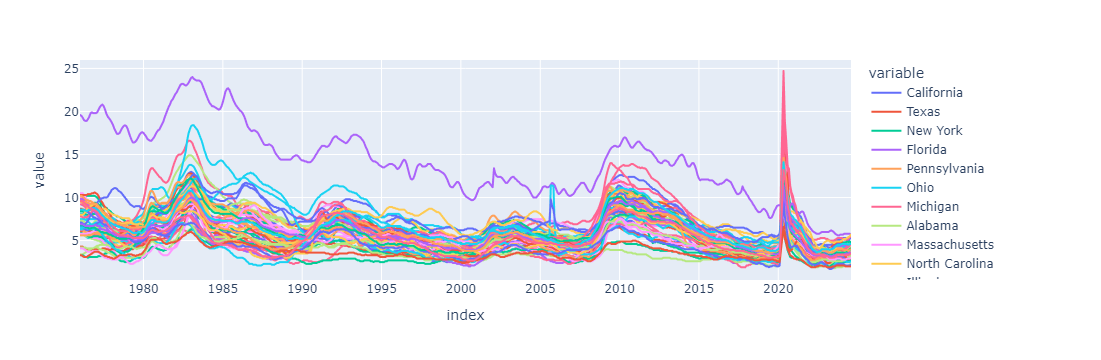

In [19]:
#Plot the unemployment rate of the states
px.line(unemp_states)

## Pull May 2020 unemployment rate per state

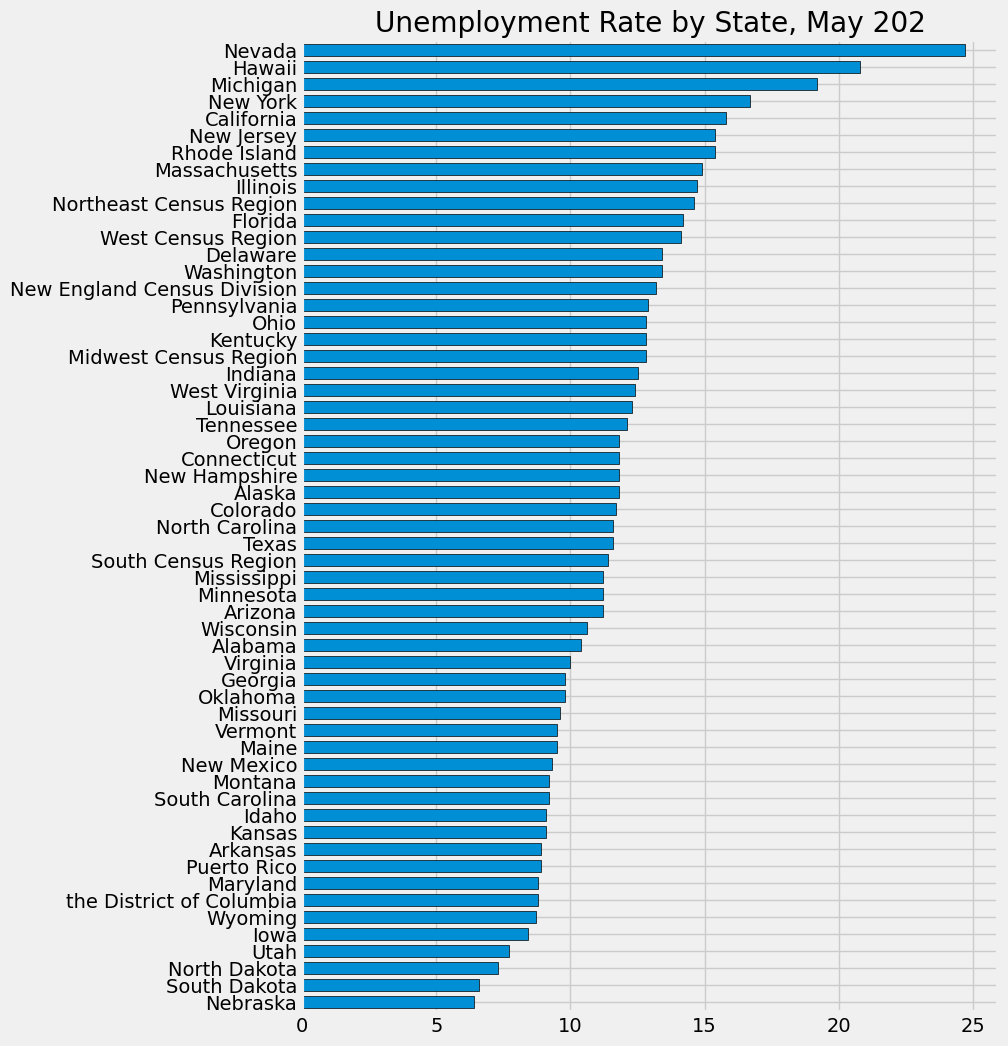

In [21]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind = 'barh', figsize = (8,12), width = 0.7, edgecolor = 'black', title = 'Unemployment Rate by State, May 202')
ax.legend().remove()
plt.show()

# Pull Participation Rate

In [23]:
partiRate_df = fred.search('Participation State', filter = ('frequency', 'Monthly'))

partiRate_df = partiRate_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

partiRate_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2024-10-12   2024-10-12   
LNS11300002          LNS11300002     2024-10-12   2024-10-12   
LNS11300001          LNS11300001     2024-10-12   2024-10-12   
LNS11300060          LNS11300060     2024-10-12   2024-10-12   
LNS11324230          LNS11324230     2024-10-12   2024-10-12   
...                          ...            ...          ...   
LRIN74FEUSM156S  LRIN74FEUSM156S     2024-10-12   2024-10-12   
LRIN74MAUSM156S  LRIN74MAUSM156S     2024-10-12   2024-10-12   
LRIN55FEUSM156S  LRIN55FEUSM156S     2024-10-12   2024-10-12   
LRIN25FEUSM156S  LRIN25FEUSM156S     2024-10-12   2024-10-12   
LNS11300018          LNS11300018     2024-10-12   2024-10-12   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
...                                                            ...   
LRIN74FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN74MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN55FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN25FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LNS11300018      Labor Force Participation Rate - 16-19 Yrs., B...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2024-09-01   Monthly               M   
LNS11300002            1948-01-01      2024-09-01   Monthly               M   
LNS11300001            1948-01-01      2024-09-01   Monthly               M   
LNS11300060            1948-01-01      2024-09-01   Monthly               M   
LNS11324230            1948-01-01      2024-09-01   Monthly               M   
...                           ...             ...       ...             ...   
LRIN74FEUSM156S        1981-01-01      2024-08-01   Monthly               M   
LRIN74MAUSM156S        1981-01-01      2024-08-01   Monthly               M   
LRIN55FEUSM156S        1977-01-01      2024-08-01   Monthly               M   
LRIN25FEUSM156S        1977-01-01      2024-08-01   Monthly               M   
LNS11300018            1972-01-01      2024-09-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11324230      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRIN74FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN74MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN55FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN25FEUSM156S  Percent           %  Seasonally Adjusted   
LNS11300018      Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short               last_updated  \
series id                                                              
CIVPART                                SA  2024-10-04 07:54:02-05:00   
LNS11300002                            SA  2024-10-04 07:54:09-05:00   
LNS11300001                            SA  2024-10-04 07:54:10-05:00   
LNS11300060                            SA  2024-10-04 07:54:06-05:00   
LNS11324230                     

In [24]:
partiRate_df = partiRate_df.loc[partiRate_df['title'].str.contains('Labor Force Participation Rate for')]
partiRate_df

id realtime_start realtime_end  \
series id                                        
LBSSA13    LBSSA13     2024-10-12   2024-10-12   
LBSSA06    LBSSA06     2024-10-12   2024-10-12   
LBSSA01    LBSSA01     2024-10-12   2024-10-12   
LBSSA53    LBSSA53     2024-10-12   2024-10-12   
LBSSA28    LBSSA28     2024-10-12   2024-10-12   
LBSSA21    LBSSA21     2024-10-12   2024-10-12   
LBSSA26    LBSSA26     2024-10-12   2024-10-12   
LBSSA48    LBSSA48     2024-10-12   2024-10-12   
LBSSA12    LBSSA12     2024-10-12   2024-10-12   
LBSSA25    LBSSA25     2024-10-12   2024-10-12   
LBSSA27    LBSSA27     2024-10-12   2024-10-12   
LBSSA24    LBSSA24     2024-10-12   2024-10-12   
LBSSA39    LBSSA39     2024-10-12   2024-10-12   
LBSSA55    LBSSA55     2024-10-12   2024-10-12   
LBSSA23    LBSSA23     2024-10-12   2024-10-12   
LBSSA22    LBSSA22     2024-10-12   2024-10-12   
LBSSA08    LBSSA08     2024-10-12   2024-10-12   
LBSSA42    LBSSA42     2024-10-12   2024-10-12   
LBSSA49    LBSSA49     2024-10-12   2024-10-12   
LBSSA18    LBSSA18     2024-10-12   2024-10-12   
LBSSA29    LBSSA29     2024-10-12   2024-10-12   
LBSSA47    LBSSA47     2024-10-12   2024-10-12   
LBSSA17    LBSSA17     2024-10-12   2024-10-12   
LBSSA51    LBSSA51     2024-10-12   2024-10-12   
LBSSA19    LBSSA19     2024-10-12   2024-10-12   
LBSSA02    LBSSA02     2024-10-12   2024-10-12   
LBSSA36    LBSSA36     2024-10-12   2024-10-12   
LBSSA04    LBSSA04     2024-10-12   2024-10-12   
LBSSA16    LBSSA16     2024-10-12   2024-10-12   
LBSSA05    LBSSA05     2024-10-12   2024-10-12   
LBSSA54    LBSSA54     2024-10-12   2024-10-12   
LBSSA40    LBSSA40     2024-10-12   2024-10-12   
LBSSA31    LBSSA31     2024-10-12   2024-10-12   
LBSSA15    LBSSA15     2024-10-12   2024-10-12   
LBSSA32    LBSSA32     2024-10-12   2024-10-12   
LBSSA30    LBSSA30     2024-10-12   2024-10-12   
LBSSA41    LBSSA41     2024-10-12   2024-10-12   
LBSSA45    LBSSA45     2024-10-12   2024-10-12   
LBSSA50    LBSSA50     2024-10-12   2024-10-12   
LBSSA09    LBSSA09     2024-10-12   2024-10-12   
LBSSA20    LBSSA20     2024-10-12   2024-10-12   
LBSSA10    LBSSA10     2024-10-12   2024-10-12   
LBSSA35    LBSSA35     2024-10-12   2024-10-12   
LBSSA56    LBSSA56     2024-10-12   2024-10-12   
LBSSA37    LBSSA37     2024-10-12   2024-10-12   
LBSSA33    LBSSA33     2024-10-12   2024-10-12   
LBSSA34    LBSSA34     2024-10-12   2024-10-12   
LBSSA38    LBSSA38     2024-10-12   2024-10-12   
LBSSA46    LBSSA46     2024-10-12   2024-10-12   
LBSSA44    LBSSA44     2024-10-12   2024-10-12   
LBSSA11    LBSSA11     2024-10-12   2024-10-12   

                                                       title  \
series id                                                      
LBSSA13           Labor Force Participation Rate for Georgia   
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA53        Labor Force Participation Rate for Washington   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA22         Labor Force Participation Rate for Louisiana   
LBSSA08          Labor Force Participation Rate for Colorado   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA49              Labor Force Participation Rate for Utah   
LBSSA18           Lab

In [25]:
part_id_to_state = partiRate_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

In [26]:
all_results = []

for id in partiRate_df.index:
    results = fred.get_series(id)
    results = results.to_frame(name = id)
    all_results.append(results)

part_states = pd.concat(all_results, axis = 1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [27]:
part_states

Georgia  California  Alabama  Washington  Mississippi  Kentucky  \
1976-01-01     63.7        62.6     57.0        60.9         58.8      60.5   
1976-02-01     63.6        62.4     56.9        60.7         58.6      60.3   
1976-03-01     63.5        62.2     56.8        60.6         58.5      60.2   
1976-04-01     63.5        62.2     56.8        60.6         58.5      60.1   
1976-05-01     63.6        62.3     56.8        60.7         58.5      60.1   
...             ...         ...      ...         ...          ...       ...   
2024-04-01     61.5        62.0     57.5        63.8         53.7      57.1   
2024-05-01     61.6        62.0     57.5        63.7         53.8      57.3   
2024-06-01     61.7        62.0     57.5        63.7         54.0      57.4   
2024-07-01     61.8        62.0     57.5        63.6         54.2      57.6   
2024-08-01     61.8        62.1     57.5        63.5         54.4      57.7   

            Michigan  Texas  Florida  Massachusetts  Minnesota  Maryland  \
1976-01-01      61.6   63.8     55.8           64.8       65.6      64.3   
1976-02-01      61.5   63.5     55.7           64.7       65.5      64.2   
1976-03-01      61.5   63.4     55.5           64.6       65.4      64.1   
1976-04-01      61.6   63.5     55.5           64.6       65.4      64.1   
1976-05-01      61.7   63.6     55.4           64.6       65.5      64.1   
...              ...    ...      ...            ...        ...       ...   
2024-04-01      62.3   64.2     59.3           65.1       68.0      65.2   
2024-05-01      62.3   64.2     59.1           65.3       68.0      65.3   
2024-06-01      62.3   64.3     58.9           65.7       67.8      65.4   
2024-07-01      62.4   64.4     58.8           66.1       67.7      65.5   
2024-08-01      62.3   64.4     58.6           66.3       67.7      65.5   

            Ohio  Wisconsin  Maine  Louisiana  Colorado  Pennsylvania  Utah  \
1976-01-01  61.7       65.6   62.1       56.8      67.2          58.4  62.8   
1976-02-01  61.7       65.5   61.9       56.6      67.0          58.3  62.6   
1976-03-01  61.7       65.4   61.9       56.5      66.8          58.3  62.5   
1976-04-01  61.6       65.4   61.8       56.4      66.6          58.3  62.5   
1976-05-01  61.6       65.5   61.7       56.4      66.5          58.3  62.6   
...          ...        ...    ...        ...       ...           ...   ...   
2024-04-01  61.8       65.6   59.4       58.8      68.0          62.9  68.9   
2024-05-01  61.9       65.6   59.5       58.6      67.9          62.9  68.7   
2024-06-01  62.1       65.5   59.6       58.6      67.9          62.9  68.6   
2024-07-01  62.3       65.5   59.8       58.6      67.9          62.9  68.6   
2024-08-01  62.3       65.5   59.9       58.6      67.9          62.7  68.5   

            Indiana  Missouri  Tennessee  Illinois  Virginia  Iowa  Alaska  \
1976-01-01     64.0      60.5       59.6      63.0      65.9  64.4    69.0   
1976-02-01     63.9      60.3       59.4      63.0      65.8  64.3    68.4   
1976-03-01     63.8      60.3       59.3      62.9      65.6  64.2    67.8   
1976-04-01     63.8      60.4       59.3      62.9      65.5  64.1    67.9   
1976-05-01     63.9      60.6       59.4      63.0      65.4  64.1    67.9   
...             ...       ...        ...       ...       ...   ...     ...   
2024-04-01     62.5      63.3       59.6      64.7      66.4  66.8    65.0   
2024-05-01     62.4      63.4       59.6      64.9      66.3  66.7    64.9   
2024-06-01     62.4      63.6       59.5      64.9      66.2  66.5    64.8   
2024-07-01     62.5      63.8       59.5      65.0      66.1  66.4    64.8   
2024-08-01     62.7      63.9       59.5      65.0      66.0  66.3    64.9   

            New York  Arizona  Idaho  Arkansas  West Virginia  Oklahoma  \
1976-01-01      58.0     59.5   63.0      57.9           52.5      59.3   
1976-02-01      58.0     59.2   62.8      57.8           52.4      59.2   
1976-03-01      58.0     59.1   62.7   

# Plot Unemployment vs Participation

In [29]:
# Fix column names
unemp_states = unemp_states.rename(columns = {'the District of Columbia' : 'District of Columbia'})
unemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah',
       'Puerto Rico', 'Indiana', 'Louisiana', 'Hawaii', 'North Dakota',
       'Montana', 'District of Columbia', 'Mississippi', 'Maine', 'Nebraska',
       'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island', 'Kansas',
       'Wyoming', 'Delaware', 'Vermont', 'South Dakota',
       'Midwest Census Region', 'South Census Region',
       'Northeast Census Region', 'West Census Region',
       'New England Census Division'],
      dtype='object')

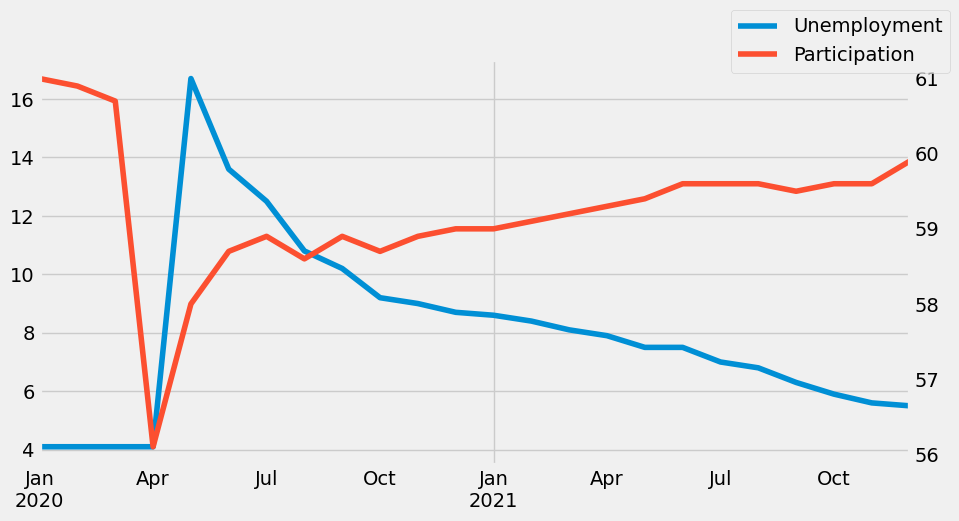

In [37]:
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
unemp_states2 = unemp_states.asfreq('MS').ffill()
unemp_states2.query('index >= 2020 and index < 2022')['New York'].plot(ax = ax, label = 'Unemployment', color = color_pal[0])
part_states.query('index >= 2020 and index < 2022')['New York'].plot(ax = ax2, label = 'Participation', color = color_pal[1])
fig.legend(labels=['Unemployment','Participation'])
#ax.set_title(state)
ax2.grid(False)

plt.show()

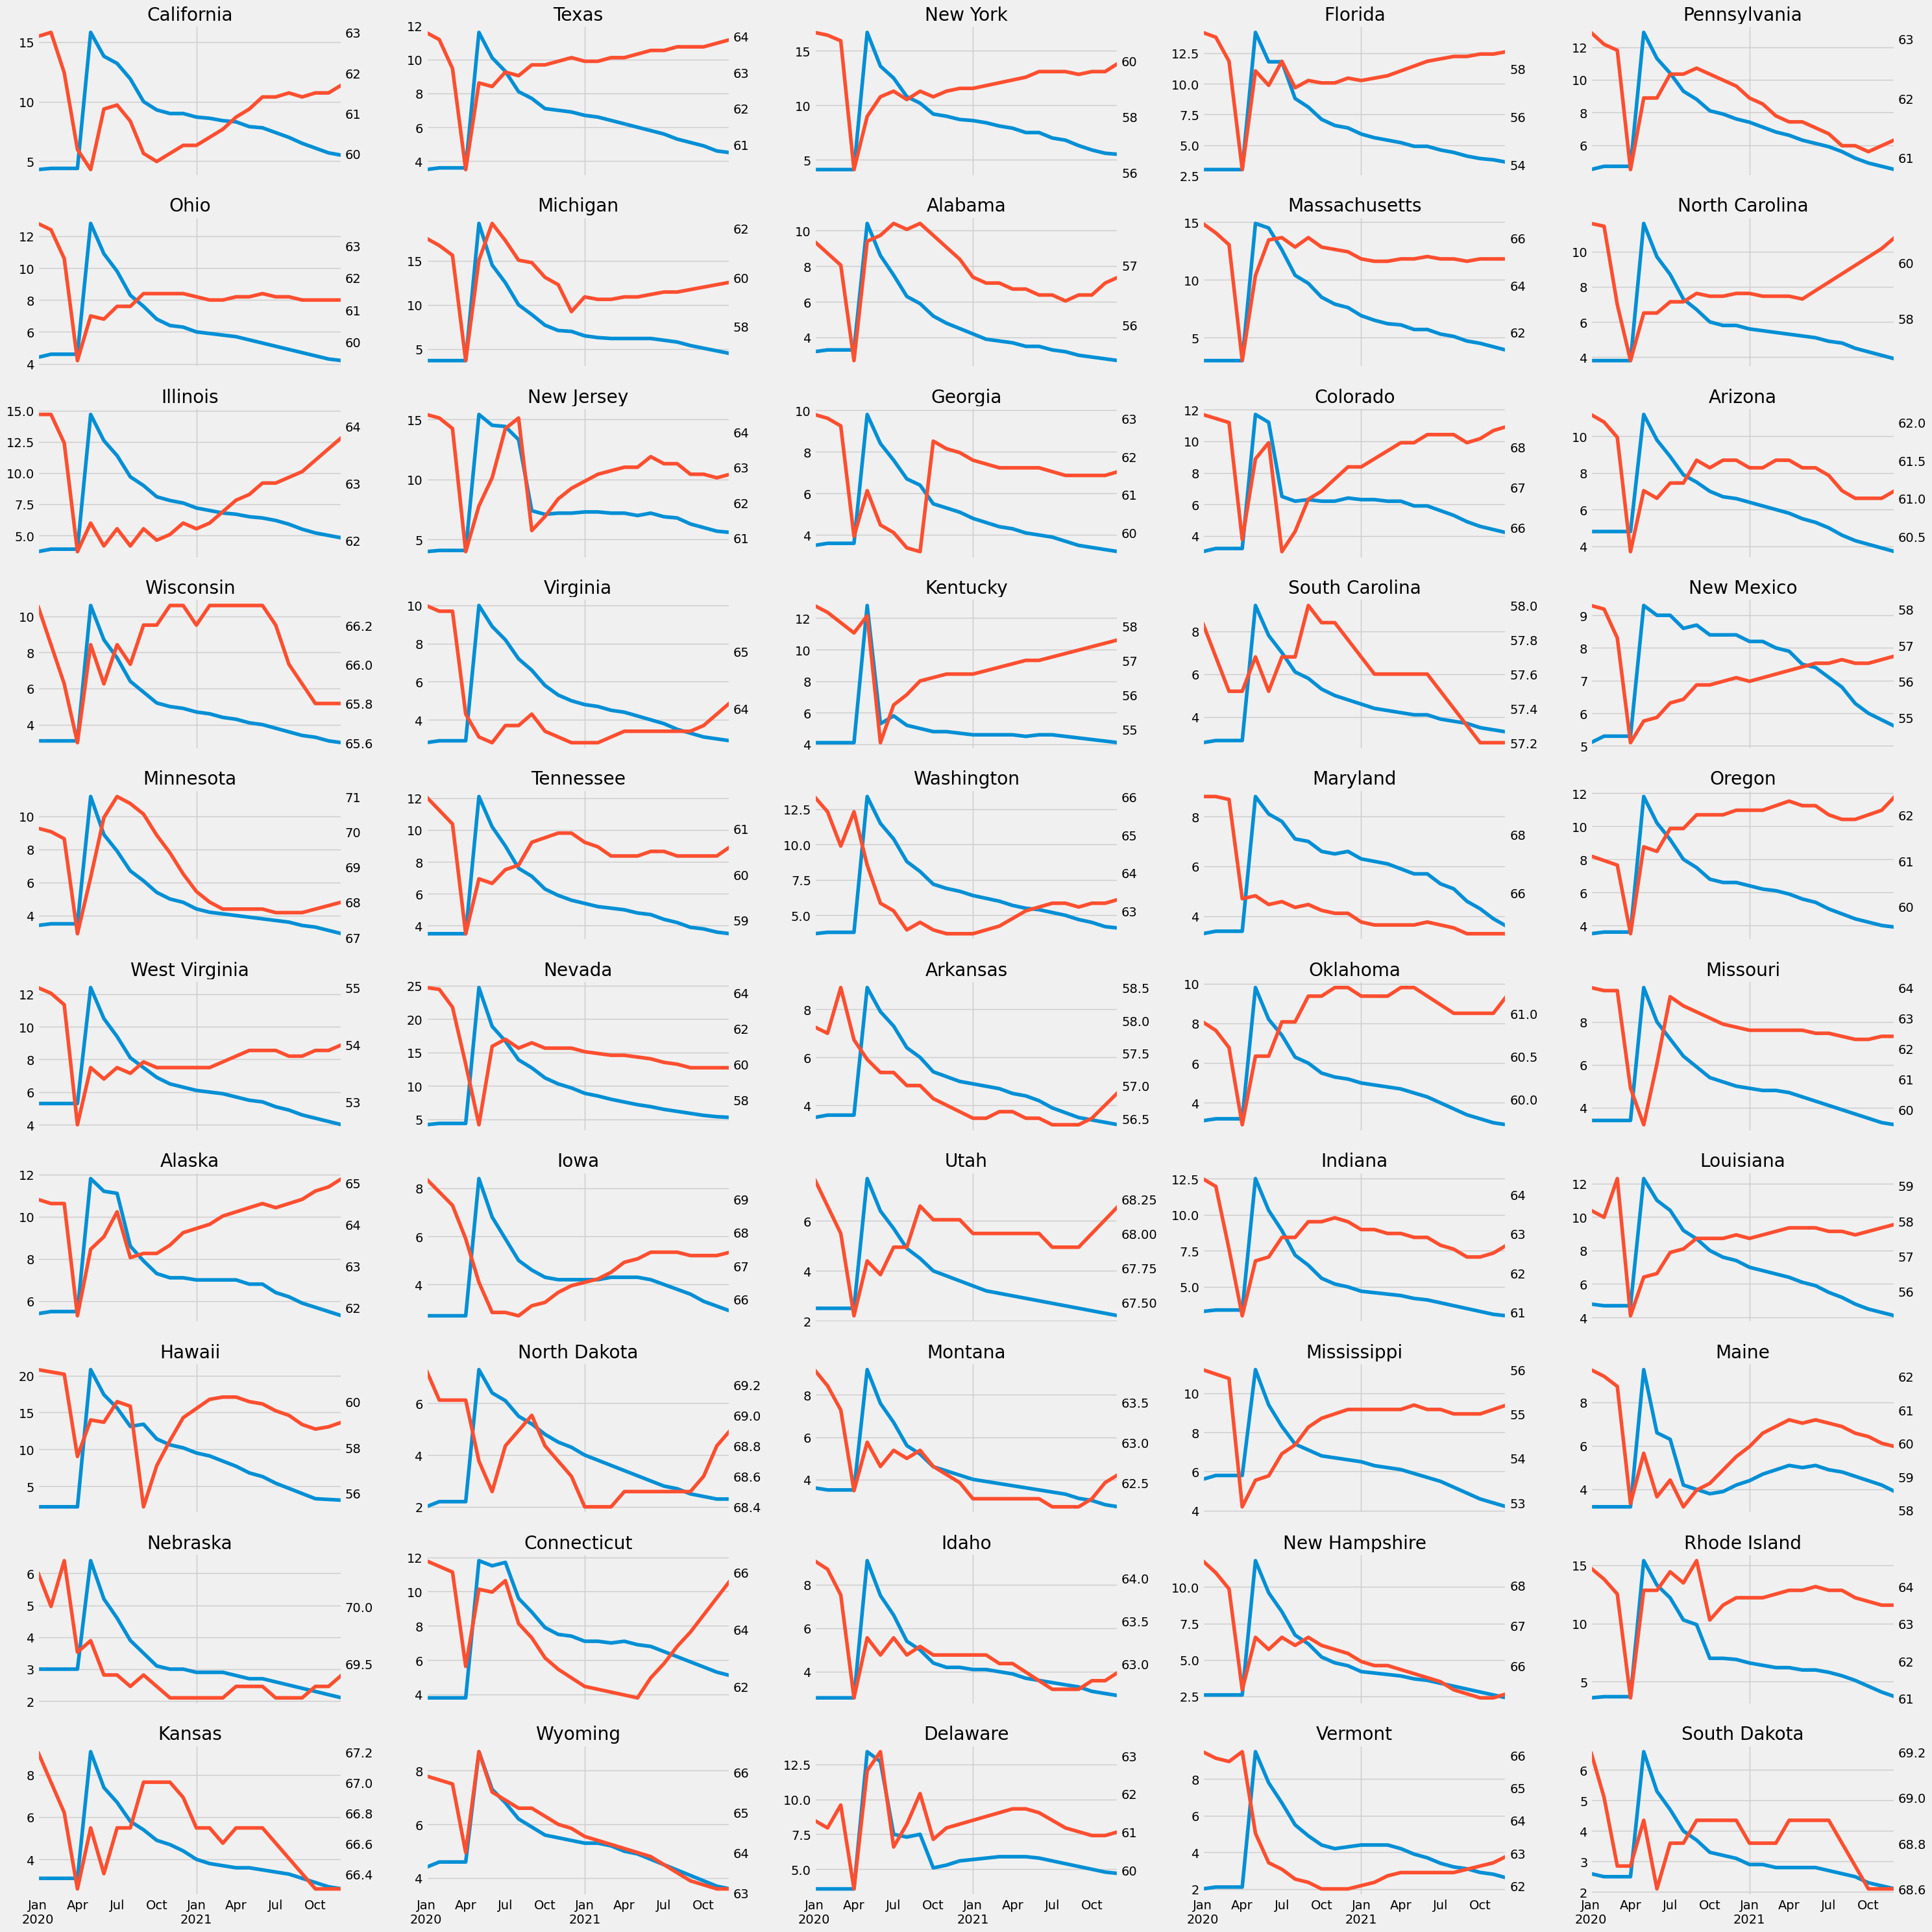

In [35]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex = True)
axs = axs.flatten()

i = 0

for state in unemp_states.columns:
    if state in ["District of Columbia","Puerto Rico"]:
        continue
    if i >= len(axs):
        break
    ax2 = axs[i].twinx()
    unemp_states2 = unemp_states.asfreq('MS').ffill()
    unemp_states2.query('index >= 2020 and index < 2022')[state].plot(ax = axs[i], label = 'Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax = ax2, label = 'Participation', color = color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1

plt.tight_layout()
plt.show()